In [204]:
using DelimitedFiles, Distributions, Plots

In [205]:
function moments(::Type{Gamma}, mean::Real, var::Real)
    shape = mean^2 / var
    scale = var / mean
    return shape, scale
end

moments (generic function with 1 method)

In [206]:
sunspot = readdlm("../data/SN_y_tot_V2.0.csv", ';')
select_1945_2020 = filter((s) -> s[1] > 1945 && s[1] < 2021, collect(eachrow(sunspot)))
observations = map((s) -> round(s[2]), select_1945_2020);

# to check that matched with Semih
cvi = readdlm("../estimations/cvi_sunspot_results.csv")
cvmp = readdlm("../estimations/cvmp_sunspot_results.csv")
aismp = readdlm("../estimations/ais_mp_sunspot_results.csv")
nuts = readdlm("../estimations/nuts_sunspot_results.csv");


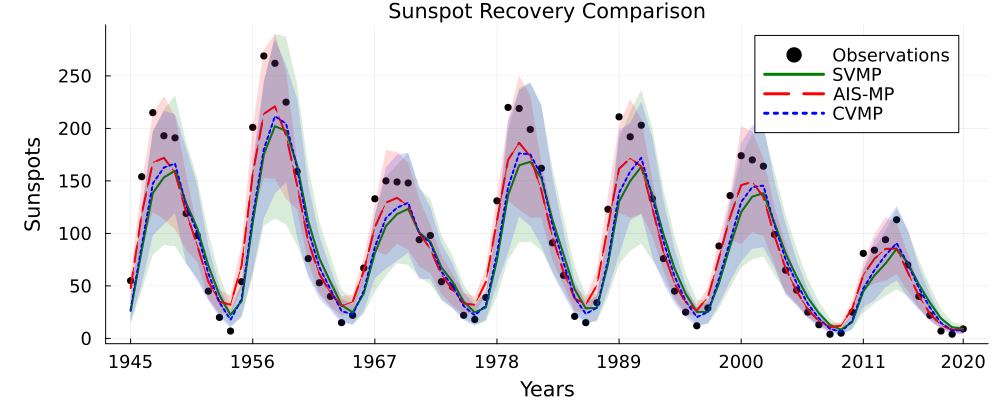

In [207]:
custom_colors = [:green, :red, :blue]
algorithms = ["SVMP", "AIS-MP", "CVMP"]
data_list = [cvi, aismp, cvmp]
linestyles = [:solid, :dash, :dot]

estimation_plot = plot(title="Sunspot Recovery Comparison",
                       guidefontsize=14,
                       tickfontsize=12,
                       legendfontsize=12,
                       legend=:topright)

scatter!(estimation_plot, observations, color=:black,
         xtick=([1, 12, 23, 34, 45, 56, 67, 76], [1945, 1956, 1967, 1978, 1989, 2000, 2011, 2020]),
         xlabel="Years", ylabel="Sunspots", label="Observations", left_margin=10Plots.mm, bottom_margin=5Plots.mm)

for (i, (algorithm, data, color, linestyle)) in enumerate(zip(algorithms, data_list, custom_colors, linestyles))
    plot!(estimation_plot, data[:, 1], ribbon=data[:, 2], label=algorithm, lw=2, size=(1000, 400), color=color, linestyle = linestyle, fillalpha=0.15)
end

for (i, (algorithm, data, color, linestyle)) in enumerate(zip(algorithms, data_list, custom_colors, linestyles))
    plot!(data[:, 1], label=false, color=color, linestyle = linestyle)
end

estimation_plot

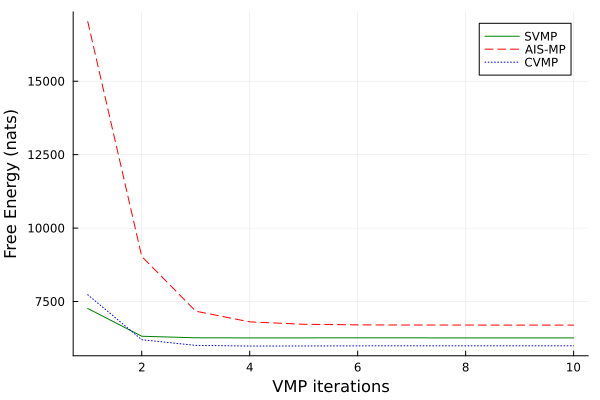

In [209]:
# to check that matched with Semih
cvi_fe = readdlm("../estimations/cvi_fe_sunspot_results.csv")
cvmp_fe = readdlm("../estimations/cvmp_fe_sunspot_results.csv")
aismp_fe = readdlm("../estimations/ais_mp_fe_results.csv")
fe_list = [cvi_fe, aismp_fe, cvmp_fe,]


fe_plot = plot(xlabel="VMP iterations", ylabel="Free Energy (nats)")

for (i, (algorithm, data, color, linestyle)) in enumerate(zip(algorithms, fe_list, custom_colors, linestyles))
    plot!(data[1, :], label=algorithm, color=color, linestyle = linestyle)
end

fe_plot

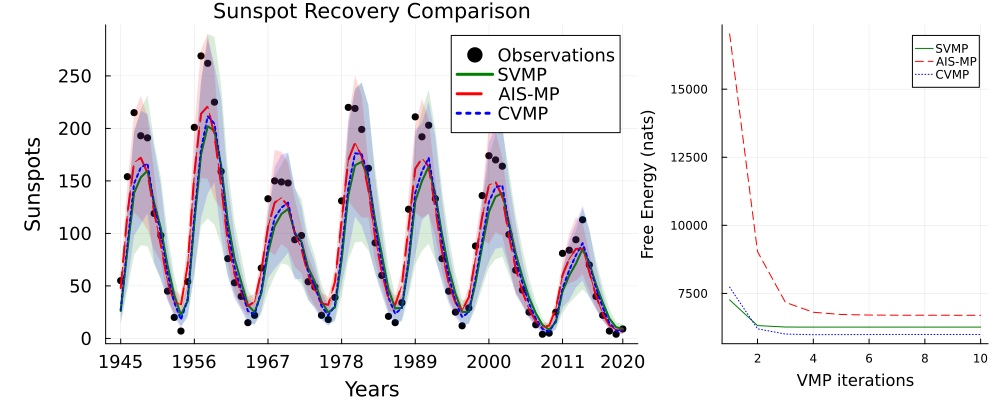

In [210]:
plot(estimation_plot, fe_plot, layout=grid(1, 2, widths=(2/3,1/3)))